In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
file_path = "corn_growth_dataset.csv"
df = pd.read_csv(file_path)


In [15]:
print(df.columns.tolist())


['Temperature(C)', 'Humidity(%)', 'SoilMoisture(%)', 'PlantHeight(cm)']


In [16]:
available_features = ['Temperature(C)', 'Humidity(%)', 'SoilMoisture(%)']
X = df[available_features]
y = df['PlantHeight(cm)']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 24.86
R² Score: 0.83


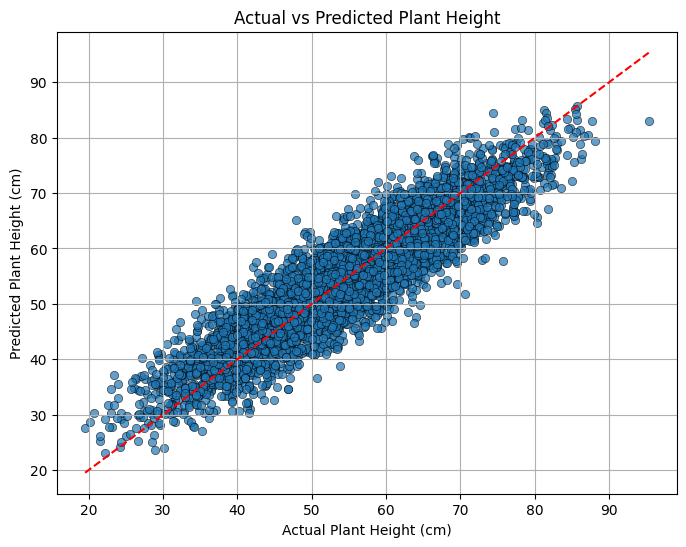

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Plant Height (cm)")
plt.ylabel("Predicted Plant Height (cm)")
plt.title("Actual vs Predicted Plant Height")
plt.grid(True)
plt.show()

KeyError: 'Temperature'

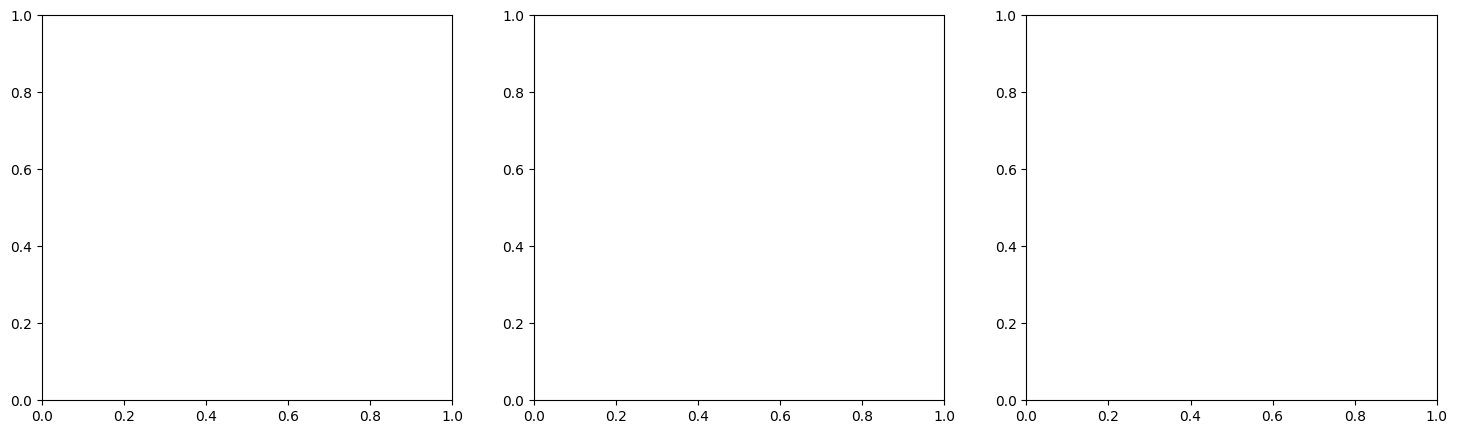

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
features = ['Temperature', 'Humidity', 'Soil_Moisture']
colors = ['blue', 'green', 'purple']

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=20, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"{feature} Distribution")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

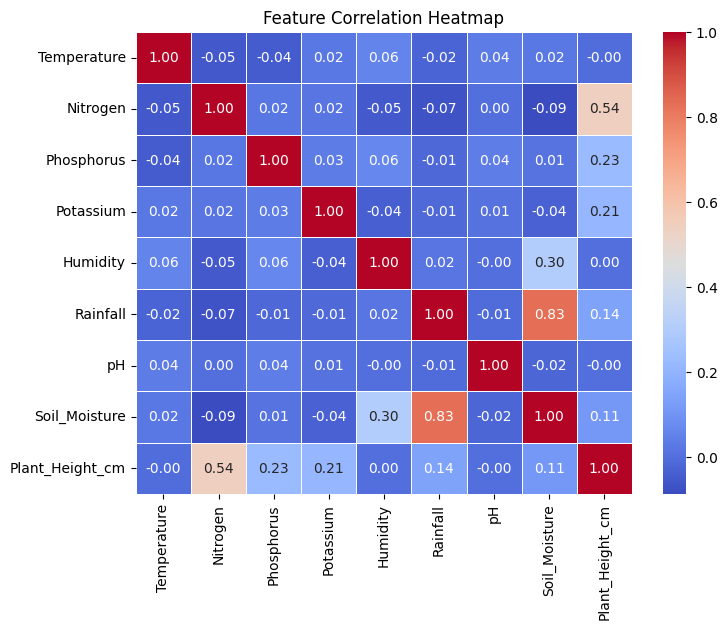

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
